In [1]:
#importing the important libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
#Reading the CSV file
df = pd.read_csv("Nifty50(15-24).csv")

In [3]:
#First 5 data rows of file
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,2015-11-09,7788.25,7937.75,7771.70,7915.20,218422388.0,9376.17
1,2015-11-10,7877.60,7885.10,7772.85,7783.35,170267413.0,7153.47
2,2015-11-11,7838.80,7847.95,7819.10,7825.00,22380435.0,1123.44
3,2015-11-13,7762.45,7775.10,7730.90,7762.25,165876819.0,7731.55
4,2015-11-16,7732.95,7838.85,7714.15,7806.60,154134885.0,6871.15


In [4]:
#Last 5 data rows of file
df.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
2143,2024-07-08,24329.45,24344.60,24240.55,24320.55,266299131.0,26356.03
2144,2024-07-09,24351.00,24443.60,24331.90,24433.20,250537091.0,29361.08
2145,2024-07-10,24459.85,24461.05,24141.80,24324.45,292263786.0,35358.54
2146,2024-07-11,24396.55,24402.65,24193.75,24315.95,306404194.0,32115.44
2147,2024-07-12,24387.95,24592.20,24331.15,24502.15,325823474.0,39565.33


In [5]:
df.describe()

,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
count,2148.000000,2148.000000,2148.000000,2148.000000,2.148000e+03,2148.000000
mean,13415.744344,13476.812640,13331.446345,13406.480354,3.453523e+08,20363.009725
std,4374.552686,4389.465459,4354.645729,4374.464663,1.963647e+08,10458.269782
min,7023.650000,7034.200000,6825.800000,6970.600000,1.661087e+07,805.890000
25%,10098.025000,10148.550000,10045.675000,10095.862500,2.124204e+08,11791.840000
50%,11660.725000,11708.475000,11580.625000,11652.325000,2.780277e+08,19274.540000
75%,17397.250000,17451.525000,17271.975000,17370.625000,4.328694e+08,26493.695000
max,24459.850000,24592.200000,24331.900000,24502.150000,1.811564e+09,93786.440000


In [6]:
df.shape

(2148, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             2148 non-null   object 
 1   Open             2148 non-null   float64
 2   High             2148 non-null   float64
 3   Low              2148 non-null   float64
 4   Close            2148 non-null   float64
 5   Shares Traded    2148 non-null   float64
 6   Turnover (₹ Cr)  2148 non-null   float64
dtypes: float64(6), object(1)
memory usage: 117.6+ KB


In [8]:
#Checking Missing Values
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Shares Traded,0
Turnover (₹ Cr),0


In [9]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,2015-11-09,7788.25,7937.75,7771.70,7915.20,218422388.0,9376.17
1,2015-11-10,7877.60,7885.10,7772.85,7783.35,170267413.0,7153.47
2,2015-11-11,7838.80,7847.95,7819.10,7825.00,22380435.0,1123.44
3,2015-11-13,7762.45,7775.10,7730.90,7762.25,165876819.0,7731.55
4,2015-11-16,7732.95,7838.85,7714.15,7806.60,154134885.0,6871.15


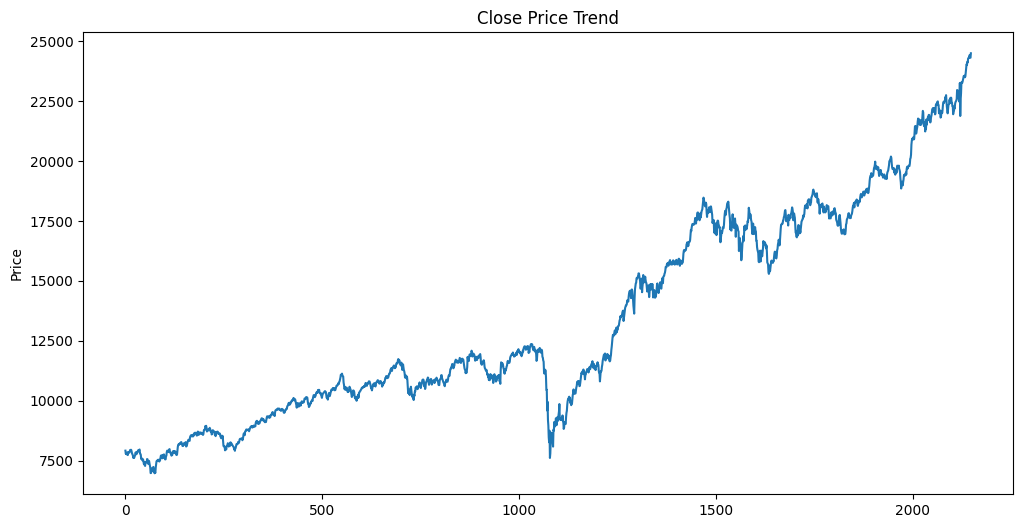

In [10]:
df['Close'].plot(figsize = (12,6), title = 'Close Price Trend', ylabel = 'Price')
plt.show()

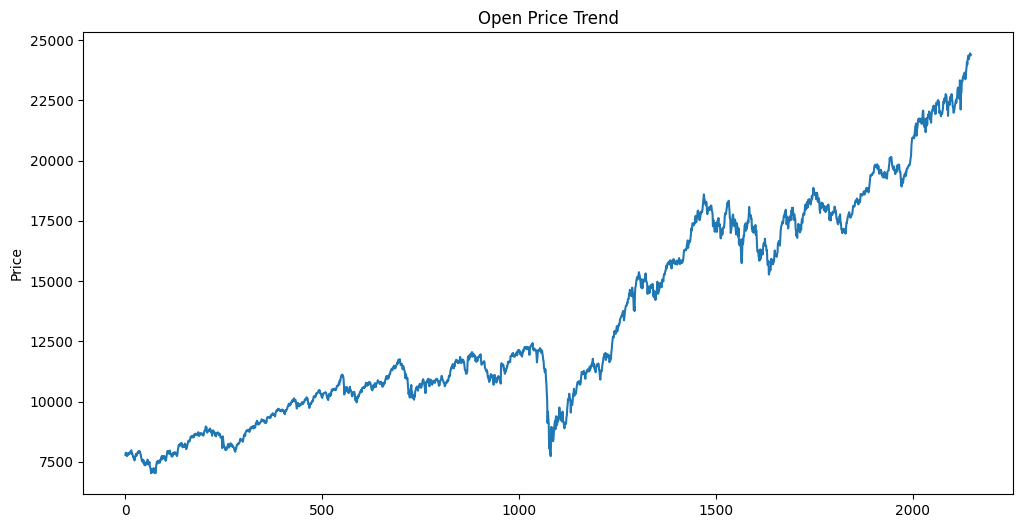

In [11]:
df['Open'].plot(figsize = (12,6), title = 'Open Price Trend', ylabel = 'Price')
plt.show()

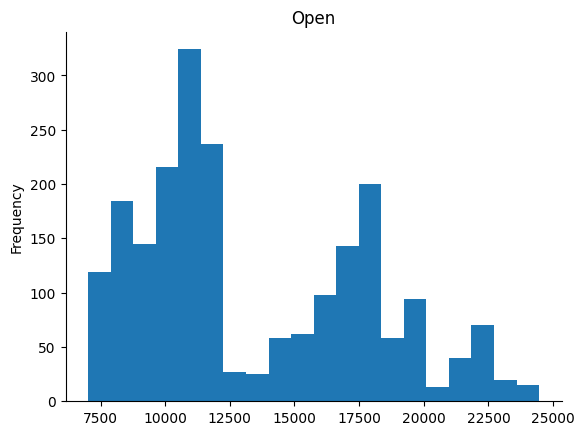

In [12]:
df['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

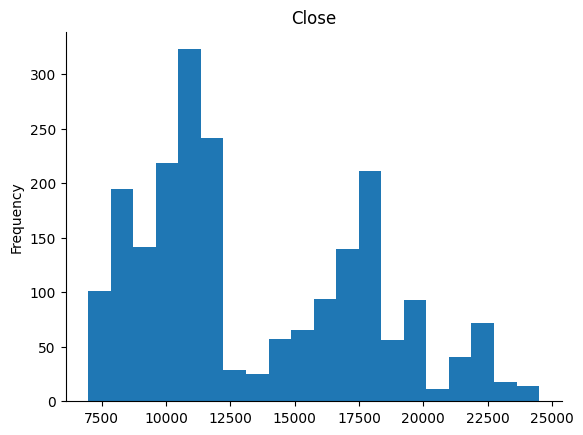

In [13]:
df['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

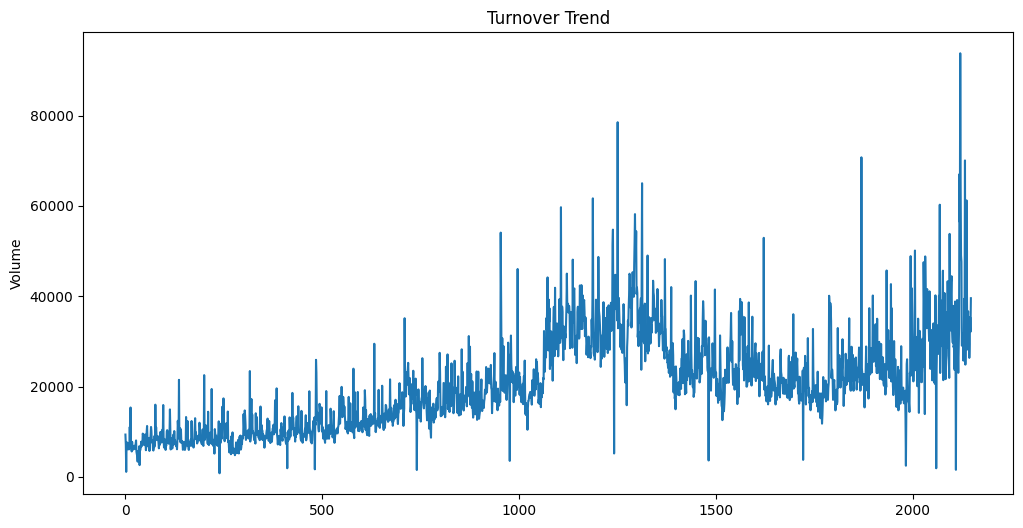

In [14]:
# Volume trend
df['Turnover (₹ Cr)'].plot(figsize=(12, 6), title='Turnover Trend', ylabel='Volume')
plt.show()

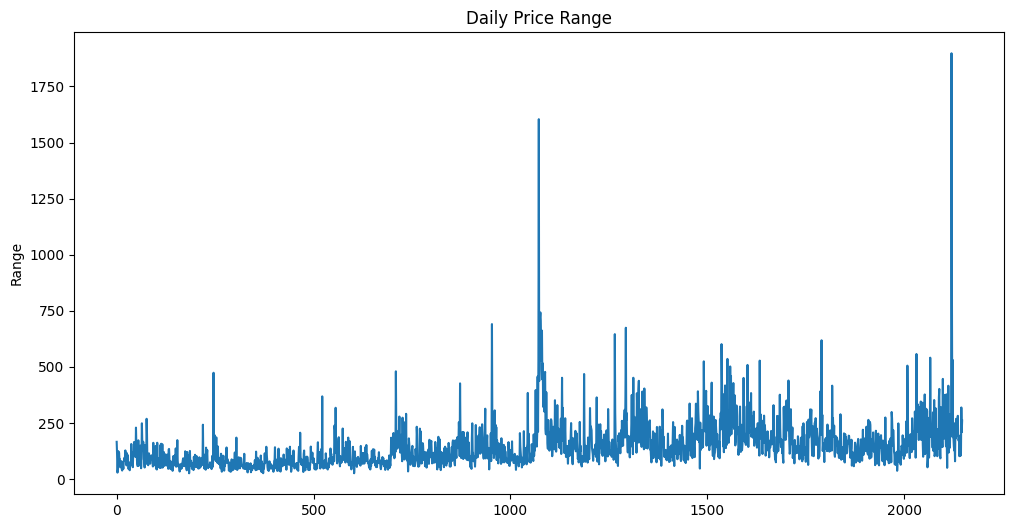

In [15]:
df['Daily Range'] = df['High'] - df['Low']
df['Daily Range'].plot(figsize=(12, 6), title='Daily Price Range', ylabel='Range')
plt.show()

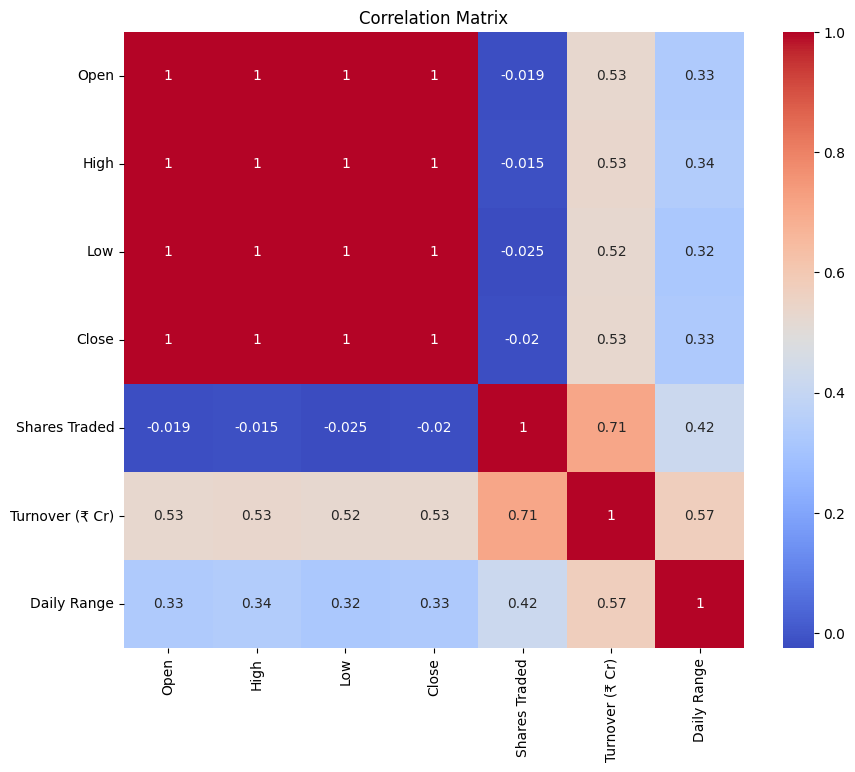

In [17]:
# Select only the numerical columns before calculating correlations
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

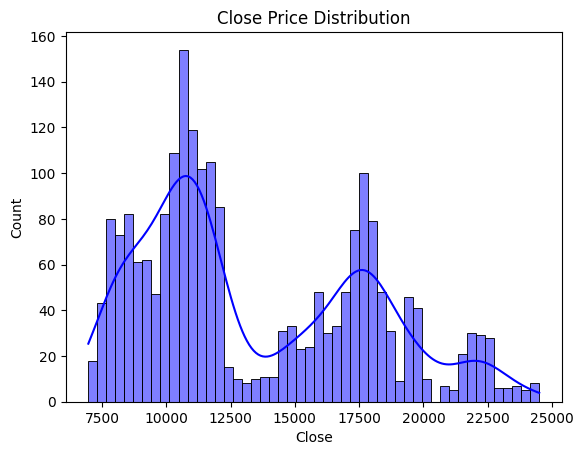

In [18]:
sns.histplot(df['Close'], bins=50, kde=True, color='blue')
plt.title('Close Price Distribution')
plt.show()


<Axes: xlabel='Turnover (₹ Cr)', ylabel='Count'>

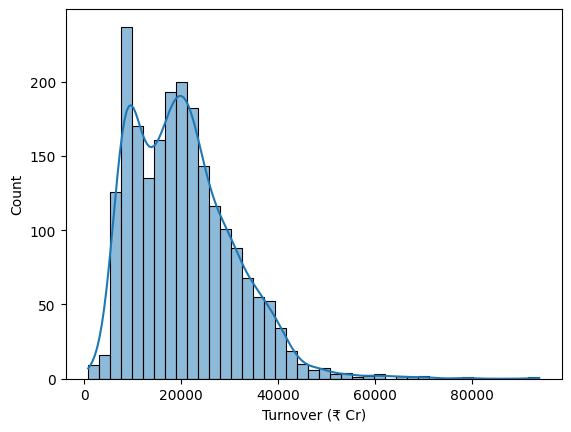

In [19]:
sns.histplot(df['Turnover (₹ Cr)'], kde=True)

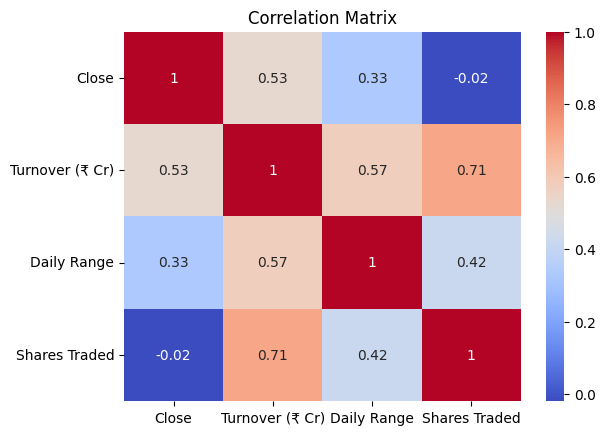

In [21]:
# Pairwise correlations
correlation_matrix = df[['Close', 'Turnover (₹ Cr)', 'Daily Range', 'Shares Traded']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [22]:
# Turnover anomalies detection (Z-score method)
df['Turnover_Z_Score'] = (df['Turnover (₹ Cr)'] - df['Turnover (₹ Cr)'].mean()) / df['Turnover (₹ Cr)'].std()
anomalies = df[df['Turnover_Z_Score'].abs() > 3]  # Threshold for outliers
print(f"Anomalies in Turnover:\n{anomalies[['Close', 'Turnover (₹ Cr)', 'Turnover_Z_Score']]}")

Anomalies in Turnover:
         Close  Turnover (₹ Cr)  Turnover_Z_Score
953   11274.20         54081.53          3.224101
1106   9199.05         59705.53          3.761857
1187  11387.50         61668.55          3.949558
1238  12749.15         54744.55          3.287498
1250  12968.95         78522.93          5.561142
1293  14281.20         51840.22          3.009791
1294  14647.85         58177.74          3.615773
1297  14924.25         54394.63          3.254039
1312  14529.15         65012.96          4.269344
1621  16584.55         52929.35          3.113932
1869  18534.40         70755.08          4.818395
2068  22023.35         60260.88          3.814959
2093  22570.35         53803.80          3.197545
2118  22530.70         67040.32          4.463196
2119  23263.90         56418.25          3.447534
2120  21884.50         93786.44          7.020610
2121  22620.35         64326.85          4.203739
2132  23501.10         70062.97          4.752216
2136  24044.50         6121

No outliers found in Close Price.


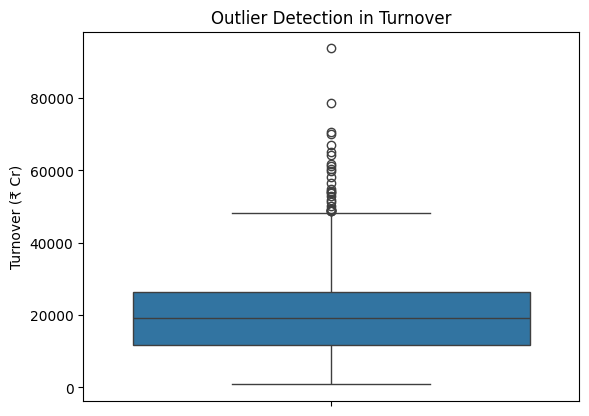

In [23]:
# Outlier detection using IQR
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
outliers_close = df[(df['Close'] < Q1 - 1.5 * IQR) | (df['Close'] > Q3 + 1.5 * IQR)]

# Check if 'Date' column exists in the original DataFrame (df)
if 'Date' in df.columns:
    # If 'Date' column exists and outliers_close is not empty, print outliers
    if not outliers_close.empty:
        print(f"Outliers in Close Price:\n{outliers_close[['Date', 'Close']]}")
    else:
        print("No outliers found in Close Price.")
else:
    print("Error: 'Date' column not found in the DataFrame.")

# Visualize outliers in Turnover
sns.boxplot(df['Turnover (₹ Cr)'])
plt.title("Outlier Detection in Turnover")
plt.show()



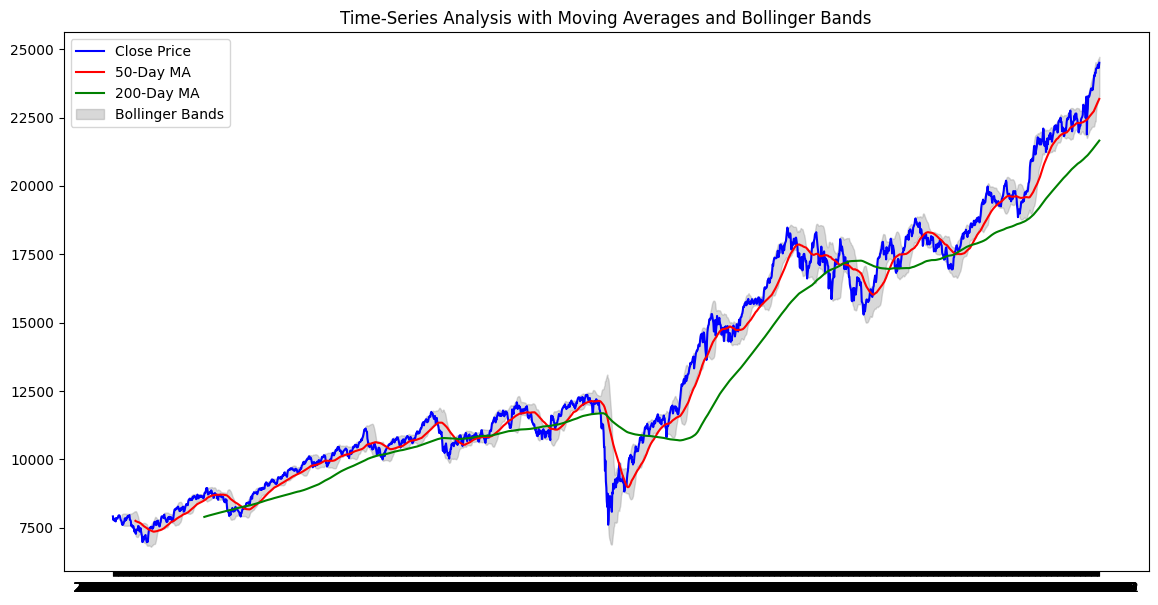

In [24]:
# Calculate Moving Averages
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

# Bollinger Bands
df['BB_Upper'] = df['Close'].rolling(window=20).mean() + 2 * df['Close'].rolling(window=20).std()
df['BB_Lower'] = df['Close'].rolling(window=20).mean() - 2 * df['Close'].rolling(window=20).std()

# Visualize Moving Averages and Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['MA_50'], label='50-Day MA', color='red')
plt.plot(df['Date'], df['MA_200'], label='200-Day MA', color='green')
plt.fill_between(df['Date'], df['BB_Upper'], df['BB_Lower'], color='gray', alpha=0.3, label='Bollinger Bands')
plt.legend()
plt.title("Time-Series Analysis with Moving Averages and Bollinger Bands")
plt.show()


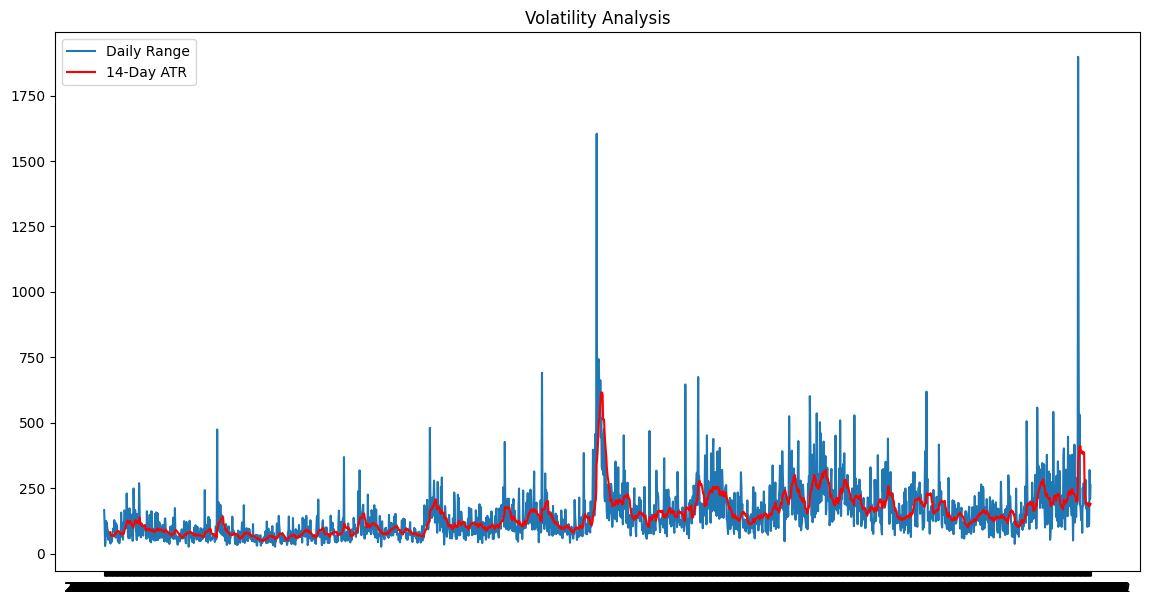

In [27]:
# Calculate Daily Range
df['Daily Range'] = df['High'] - df['Low']

# Calculate ATR
df['ATR'] = df['Daily Range'].rolling(window=14).mean()

# Visualize volatility trends
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Daily Range'], label='Daily Range')
plt.plot(df['Date'], df['ATR'], label='14-Day ATR', color='red')
plt.legend()
plt.title("Volatility Analysis")
plt.show()


In [149]:
# Using MinMaxScaler to scale the 'Close' price
scaler = MinMaxScaler(feature_range=(0, 1))
df['Scaled_Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))



In [150]:
# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train_data = df['Scaled_Close'][:train_size]
test_data = df['Scaled_Close'][train_size:]

In [151]:
# Prepare data for training and testing (scaling step is now done above)
train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))  # Fit scaler on training data
test_scaled = scaler.transform(test_data.values.reshape(-1, 1))  # Apply the same scaler to test data

In [152]:
# Now create sequences using the scaled data
def create_sequences(data, sequence_length):
    x = []
    y = []
    for i in range(sequence_length, len(data)):
        x.append(data[i-sequence_length:i, 0])  # Past 'sequence_length' days
        y.append(data[i, 0])  # Target: next day's close price
    return np.array(x), np.array(y)

sequence_length = 60  # Use 60 days to predict the next day's close price

# Create sequences for train and test
x_train, y_train = create_sequences(train_scaled, sequence_length)
x_test, y_test = create_sequences(test_scaled, sequence_length)

# Reshape x to be 3D as required by LSTM (samples, time_steps, features)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [153]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout for regularization
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predict the next closing price


In [154]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [179]:
# Train the model
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/50
52/52 [==============================] - 3s 49ms/step - loss: 0.0017 - val_loss: 0.0045
Epoch 2/50
52/52 [==============================] - 2s 42ms/step - loss: 0.0016 - val_loss: 0.0073
Epoch 3/50
52/52 [==============================] - 2s 45ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 4/50
52/52 [==============================] - 2s 47ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 5/50
52/52 [==============================] - 2s 47ms/step - loss: 0.0014 - val_loss: 0.0065
Epoch 6/50
52/52 [==============================] - 2s 45ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 7/50
52/52 [==============================] - 2s 42ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 8/50
52/52 [==============================] - 2s 44ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 9/50
52/52 [==============================] - 2s 44ms/step - loss: 0.0012 - val_loss: 0.0030
Epoch 10/50
52/52 [==============================] - 2s 45ms/step - loss: 0.0013 - val_loss: 0.0044
Epoch 11/

In [180]:
# Predict the stock prices
y_pred = model.predict(x_test)

12/12 [==============================] - 0s 15ms/step


In [181]:

# Inverse transform predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

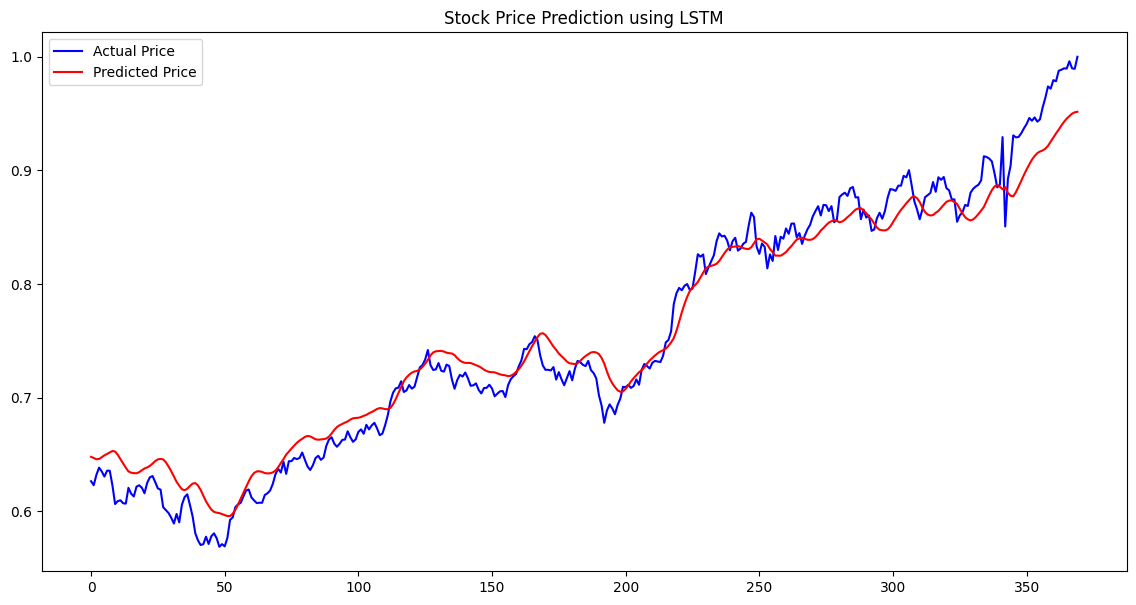

In [182]:
# Visualize results
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, label='Actual Price', color='blue')
plt.plot(y_pred, label='Predicted Price', color='red')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()


In [185]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test_actual, y_pred))
print(f'RMSE: {rmse}')


RMSE: 0.02159534088262214


In [186]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_actual, y_pred)
print(f'R²: {r2}')


R²: 0.9631454121336079


In [143]:
# Allow the user to enter a date for prediction
user_input_date = input("Enter a date (YYYY-MM-DD) to predict the stock price: ")

# Function to predict the next day's closing price and return the date
def predict_stock_price_with_date(model, data, sequence_length, scaler, df, user_date):
    # Ensure the date input is in datetime format
    user_date = pd.to_datetime(user_date)

    # Check if the entered date exists in the dataset
    if user_date not in df['Date'].values:
        return "Entered date not found in the dataset. Please enter a valid date."

    # Find the index of the entered date
    date_index = df[df['Date'] == user_date].index[0]

    # Create the sequence of 'sequence_length' previous days
    start_index = max(date_index - sequence_length + 1, 0)
    recent_data = df['Scaled_Close'][start_index:date_index + 1].values.reshape(-1, 1)

    # Ensure the data is properly reshaped for prediction
    recent_data = recent_data.reshape(1, sequence_length, 1)

    # Predict the next day's stock price (scaled)
    predicted_price_scaled = model.predict(recent_data)

    # Inverse transform to get the actual predicted price
    predicted_price_actual = scaler.inverse_transform(predicted_price_scaled.reshape(-1, 1))

    # Get the actual closing price on the user-entered date
    actual_price = df[df['Date'] == user_date]['Close'].values[0]

    return predicted_price_actual[0][0], actual_price

# Get the predicted stock price and actual price
predicted_price, actual_price = predict_stock_price_with_date(model, last_n_days_data, sequence_length=60, scaler=scaler, df=df, user_date=user_input_date)

# Output the results
if isinstance(predicted_price, str):
    print(predicted_price)  # Error message if the date is invalid
else:
    print(f"Predicted stock price for {user_input_date}: {predicted_price}")
    print(f"Actual stock price for {user_input_date}: {actual_price}")


Enter a date (YYYY-MM-DD) to predict the stock price: 2024-07-12
1/1 [==============================] - 0s 31ms/step
Predicted stock price for 2024-07-12: 24446.03515625
Actual stock price for 2024-07-12: 24502.15
